# Annual Domestic Demand Profile for Kennington 2

This is creating an average annual domestic demand profile for one domestic home in Kennington. It will have 48*365 data points each of which is the half hourly power (kW).

I have encorporated seasonal variation into this model.

NOTE: I am using **class 1** elexon profiles for my approximation of the Kennington non-domestic loads ~ as 83% of UK has unresticted meters


**Author:** Minnie Karanjavala

**Date:** April 6th, 2021

**College:** St Peter's

## How it Differs from Previous Version:
- in Dom_elec_annual_profile_1 I was using the # households = 1728 (census 2011) along w the annual electrcity demand from about 2015 i think (according to the number of electric meters in ~2015) so this didn't really add up fully. I now have Kennington household data for every year so I am going to use # households for the correct year.
- in Dom_elec_annual_profile_2 I was using the updated figures for 2018 and here i am using the updated figures for 2020
- in this file I have made some nice looking plots for my report

## Goal:
- to produce an annual domestic demand profile for average user for current electricity consumption in Kennington (not incl electrification of gas)

- find a scale factor which scales the average UK demand profile to match Kennington's annual usage

- OUTPUT = I want to produce a csv file which has 365*48 data points which is the domestic electricity demand profile for the year


### NOTE: I am combinging the daily elexon demand profiles for weekdays and weekends across the seasons to form an accurate annual demand profile for the average user in Kennington.

## Plan:
- figure out how many weeks for each season 
- string together the various daily profiles of each season (weekday + weekend) to form an annual UK non-dom demand profile for average user 
- scale this annual UK demand per user (using scale factor) to match Kennington's demand per user
- export the scaled profile in a CSV file 
- plot it to check what it looks like - both daily and annual profiles

In [186]:
# importing the modules
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statistics

In [187]:
# read csv into a dataframe
non_dom_load_df = pd.read_csv('../../data/ProfileClass1.csv')  
non_dom_load_df['Time'] = pd.to_datetime(non_dom_load_df['Time'])
#non_dom_load_df.info()

Create a 'seasons' array which contains 365 elements - specifying whether each day of the year is a weekday or sat or sun and which season it is 

In [188]:
# make an array for each season - representing one week in that season

Wtr = np.array(['Wtr Wd', 'Wtr Wd', 'Wtr Wd', 'Wtr Wd', 'Wtr Wd', 'Wtr Sat', 'Wtr Sun'])
Spr = np.array(['Spr Wd', 'Spr Wd', 'Spr Wd', 'Spr Wd', 'Spr Wd', 'Spr Sat', 'Spr Sun'])
Smr = np.array(['Smr Wd', 'Smr Wd', 'Smr Wd', 'Smr Wd', 'Smr Wd', 'Smr Sat', 'Smr Sun'])
Hsr = np.array(['Hsr Wd', 'Hsr Wd', 'Hsr Wd', 'Hsr Wd', 'Hsr Wd', 'Hsr Sat', 'Hsr Sun'])
Aut = np.array(['Aut Wd', 'Aut Wd', 'Aut Wd', 'Aut Wd', 'Aut Wd', 'Aut Sat', 'Aut Sun'])


print(Wtr)
type(Wtr)

['Wtr Wd' 'Wtr Wd' 'Wtr Wd' 'Wtr Wd' 'Wtr Wd' 'Wtr Sat' 'Wtr Sun']


numpy.ndarray

### How Many Weeks each Elexon season lasts

- winter = 22 weeks 
- spring = 6 weeks 
- summer = 10 weeks 
- high summer = 6 Weeks
- autumn = 8 weeks 

Calculated from the info given in Elexon document about the load profiles.

In [189]:
# add the correct number of weeks worth of each season to the 'seasons' array to make up a year (ie 52 wks = 365 days) using the weeks given above
seasons = np.array([])  # define an empty array 

for i in range(22):
    seasons = np.append(seasons,Wtr) 

for i in range(6):
    seasons = np.append(seasons,Spr) 

for i in range(10):
    seasons = np.append(seasons,Smr) 

for i in range(6):
    seasons = np.append(seasons,Hsr) 

for i in range(8):
    seasons = np.append(seasons,Aut)

seasons = np.append(seasons,'Aut Wd')   # I add this as 52wks*7days = 364 days so I need to add one more day to make it up to 365

#print(seasons)
seasons.size

365

In [190]:
# create an array which contains 48*365 data points ~ half hourly power (kW) for an average non-domestic user in the UK ~ call this UK_annual_demand 
UK_annual_demand = np.array([])        # define empty array - this will contain the average non dom demand profile of a UK user

for day in seasons:
    UK_annual_demand = np.append(UK_annual_demand,non_dom_load_df[day].values)   # kW

print(UK_annual_demand.size)

17520


### NOTE:
- This way of forming the annual demand profile means that the first day of winter (eg 25th Oct) is set as having a weekday profile (ie Monday). This will not be true for every year. So basically the dates do not allign to whether the profile is a weekday or a weekend. But throughout the whole year there will be the correct number of weekdays vs weekends.

## Find scale factor for Kennington 

Find the scale factor which will scale the average demand of UK non dom user to the average demand of a kennington non-dom user

**QUICK EXPLAINATION OF CHANGES MADE TO THESE NOS IN 'Dom_elec_annual_profile_2'**
- the number of households has increased from my previous usage of the 2011 census data as this figure is for 2018
- ken annual usage has increased from 7,806,000 kWh to 8270500 kWh. This is cos we have taken into account that the # of electric meters has grown w population ~ we are using the average electriicty per meter for 2018 for south oxfordshire
- overall these changes have caused the scale factor for kennington to decrease slightly from 1.15 to 1.1 so not much difference but the electrcity usage of kennington is now a bit closer to the UK average


In [191]:
ken_annual_nd_usage = 8351640   #kWh ~ this is for all the domestic households in Kennington not just one in 2018

# this number of households has decreased from 
ken_nd_users = 1985   # households in Kennington in 2018

ken_avg_annual_usage_per_nd_user = ken_annual_nd_usage/ken_nd_users # kWh - avg annual energy (kWh) useage PER DOMESTIC HOUSEHOLD in kennington  

UK_avg_anuual_usage_per_nd_user = np.sum(UK_annual_demand)*0.5 # the UK_annual_demand array is POWER for every 0.5hr so we need to CONVERT it from kW to kWh by *0.5hr

print(UK_avg_anuual_usage_per_nd_user)
print(ken_avg_annual_usage_per_nd_user)

3921.925
4207.3753148614605


In [192]:
# SF = scale factor 
SF = ken_avg_annual_usage_per_nd_user/UK_avg_anuual_usage_per_nd_user 
ken_avg_nd_load_profile = UK_annual_demand*SF 

# just printing a few things to sanity check my figures
print(SF)

# print(ken_avg_nd_load_profile.size)
print(np.sum(ken_avg_nd_load_profile))  # this isn't the total UK energy usage per day * SF cos that value would be in kWh and this load profile is in kW
print(ken_avg_nd_load_profile)


1.072783216114908
8414.750629722921
[0.35401846 0.3003793  0.2681958  ... 0.54711944 0.45056895 0.36474629]


**SENSE CHECK:**
- it makes sense that the average electricity consumption in a household in kennington is higher than the average UK consumption as the demogrpahic in kennington is more affluent than the UK average hence they probably have a larger number of more powerful devices (eg big fridge, computers, lots of lights on for a lot of the time as it's a bigger house)

## Correct order of data - to make day 1 = 1st Jan

How I formed my demand dataset meant that the first 22 weeks of the dataset are for winter data so the day 1 demand profile isn't for 1st Jan it's for 25th Oct. I needed to fix this by taking the data 25th Oct -31st Dec and adding it onto the end of the data set which was days 1st Jan-24th Oct.

The first 9 weeks and 4 days make up (25th Oct - 31st Dec) then the rest is 1st Jan-24th Oct 

In [193]:

print(ken_avg_nd_load_profile.size)

# this extracts the data points for days 25 Oct-31st Dec
end_of_year = ken_avg_nd_load_profile[0:48*(9*7+4)]     # we know that dec 31st is 9 weeks and 4 days after the start of dataset. This is half hourly data so 48 data points in each day therefore the num of datapoints in the first 9 weeks and 4 days = 48*(9*7+4)

# this captures the data points for days 1st Jan-25th Oct 
start_of_year = ken_avg_nd_load_profile[48*(9*7+4):]

corrected_ken_avg_nd_load_profile = np.append(start_of_year,end_of_year)

print(end_of_year.size)
print(start_of_year.size)
print(ken_avg_nd_load_profile.size)


17520
3216
14304
17520


## Write output to CSV file


In [194]:
# convert numpy array to dataframe
ken_nd_df = pd.DataFrame(corrected_ken_avg_nd_load_profile, columns=['Power (kW)'])
print(ken_nd_df.head())
print(ken_nd_df.info())

#write dataframe to a csv file 
ken_nd_df.to_csv('ken_dom_annual_demand_per_household_3.csv',index=True)   # turn index = True to get an index column

   Power (kW)
0    0.354018
1    0.300379
2    0.268196
3    0.246740
4    0.236012
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Power (kW)  17520 non-null  float64
dtypes: float64(1)
memory usage: 137.0 KB
None


# Plot the demand profiles

This allows me to visualise the load and sanity check it.

## Plot Daily demand profiles

In [195]:
index = np.arange(1,len(corrected_ken_avg_nd_load_profile)+1,1)

x = corrected_ken_avg_nd_load_profile[0:48]

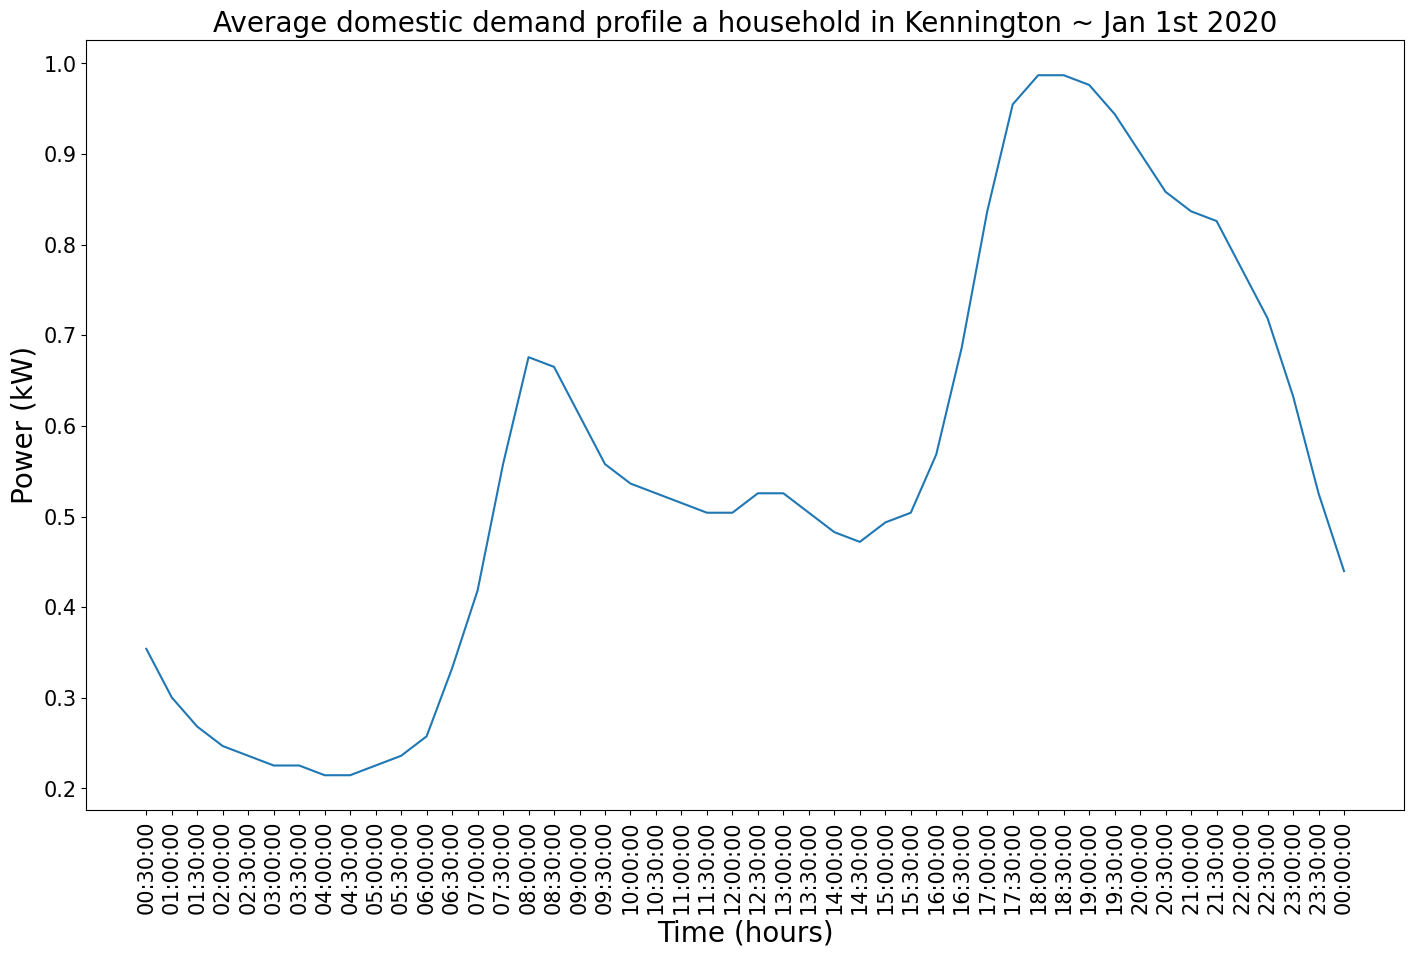

In [196]:
fig1, ax1 = plt.subplots(figsize=(17,10))

ax1.plot(non_dom_load_df['Time'].dt.strftime("%X"),x)

ax1.set(xlabel="Time (hours)",
    ylabel = "Power (kW)",
    title = 'Average domestic demand profile a household in Kennington ~ Jan 1st 2020');

plt.xticks(rotation=90);

ax1.xaxis.label.set_size(20)
ax1.yaxis.label.set_size(20)
ax1.title.set_size(20)

ax1.tick_params(axis='both', which='major', labelsize=15)

In [197]:
## ADD OWN DATE COLUMN TO DATA SET
ken_nd_df['Time'] = pd.date_range(start='1/1/2020', periods = len(ken_nd_df), freq='0.5H')

print(ken_nd_df.head())
print(ken_nd_df.info())

   Power (kW)                Time
0    0.354018 2020-01-01 00:00:00
1    0.300379 2020-01-01 00:30:00
2    0.268196 2020-01-01 01:00:00
3    0.246740 2020-01-01 01:30:00
4    0.236012 2020-01-01 02:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Power (kW)  17520 non-null  float64       
 1   Time        17520 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 273.9 KB
None


## Plot Annual demand

In [198]:
daily_mean = []

for i in range(365):
    #daily_mean(i) = mean(corrected_ken_avg_nd_load_profile[i*48:48*(i+1)])
    daily_mean = np.append(daily_mean,np.mean(corrected_ken_avg_nd_load_profile[i*48:48*(i+1)])) 
    
print(len(daily_mean))
#print(daily_mean)


365


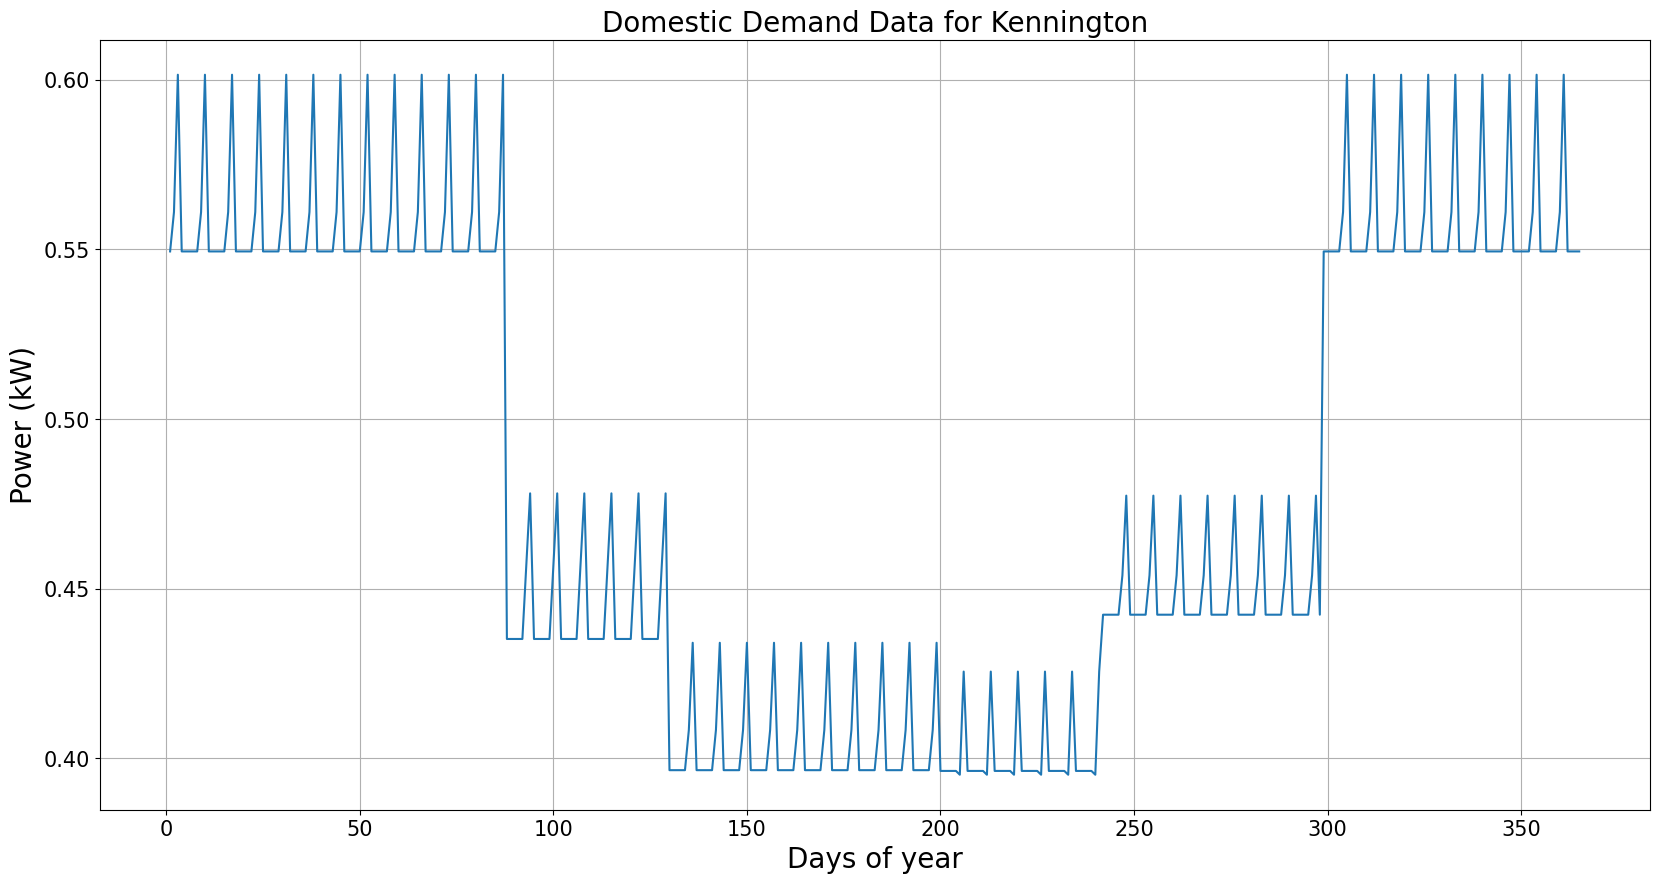

In [199]:
plt.style.use('default')

fig2, ax2 = plt.subplots(figsize=(20,10))
day = np.arange(1,366)
i = 0
#ax2.plot(day[days*48:(days+7)*48],daily_mean[days*48:(days+7)*48])
ax2.plot(day[0:365],daily_mean[0:365])


ax2.set(xlabel='Days of year', ylabel='Power (kW)',title="Domestic Demand Data for Kennington")
ax2.xaxis.label.set_size(20)
ax2.yaxis.label.set_size(20)
ax2.title.set_size(20)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.grid(b=True)


#### DAILY MEANS:

- winter weekday = 0.54935
- winter sat = 0.56097
- winter sun = 0.6014
- 7.2% diff between sat and sun 

- summer weekday = 0.39648
- summer sat = 0.40832
- summer sun = 0.434
- 6.35 diff between sat and sun 

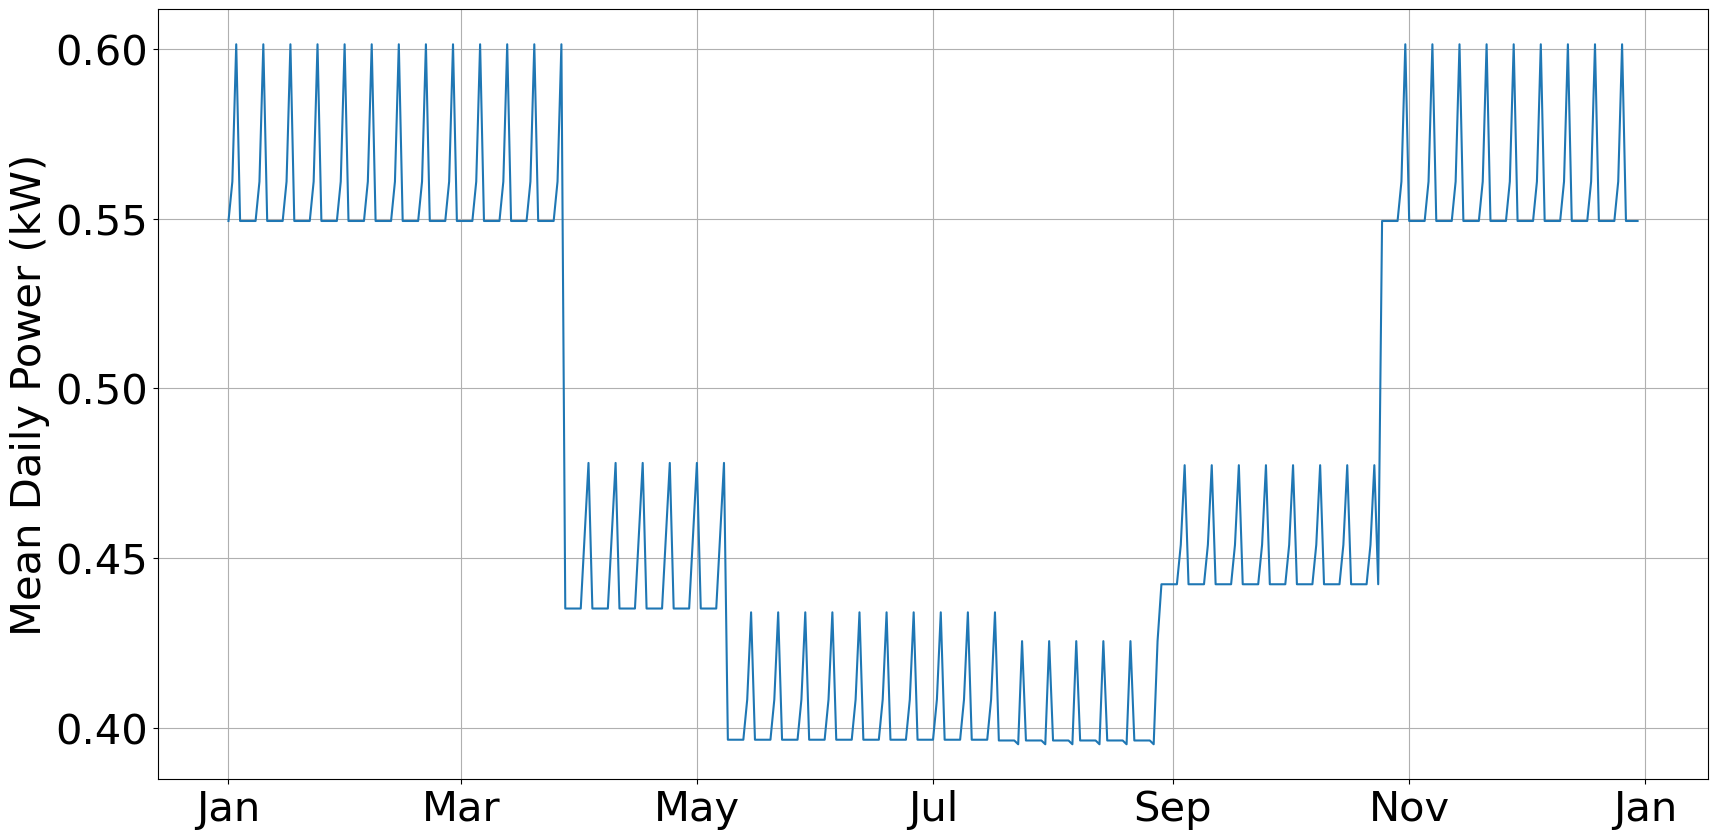

In [203]:
#### MORE ASTHETIC VERSION OF THE PLOT ABOVE - WITH BETTER X AXIS 
plt.style.use('default')                    # style of plot 
fig2, ax2 = plt.subplots(figsize=(20,10))   # size of figure window

#plt.xticks(rotation=90)                    # makes x-axis labels lie 90º to axis 
#plt.gcf().autofmt_xdate()                  # automatic rotation of the x-labels to angle that makes them fit       
#fig2.tight_layout(pad=3.0)                 # sets spacing between sub plots

#create datatime array to be x-axis ~ here the freq is set as D for days 
x_axis = pd.date_range(start='01/01/2020', periods = 365, freq= 'D')  

# choose the format you want the labels on x-axis to appea r as. Here %b gives abbrev month names
myFmt = mdates.DateFormatter('%b')          # format chosen 
ax2.xaxis.set_major_formatter(myFmt)        # the chosen format applied to the axis 

ax2.plot(x_axis,daily_mean)                 # actual PLOT command ~ x-axis array must be same length as daily_mean

# axis labels 
ax2.set_ylabel('Mean Daily Power (kW)')
#ax2.set_xlabel('Date')
#ax2.set_title('Domestic Demand Data for Kennington')
# axis label sizes set 
ax2.xaxis.label.set_size(30)
ax2.yaxis.label.set_size(30)
ax2.title.set_size(30)
# set size of numbers on axis 
ax2.tick_params(axis='both', which='major', labelsize=30)   
ax2.grid(b=True)    # adds grid to plot



NOTE:
- from looking at the plot above we can see that the 1st Jan has been assigned a Friday 

### Analysis of plot 

- winter = 22 weeks 
- spring = 6 weeks 
- summer = 10 weeks 
- high summer = 6 Weeks
- autumn = 8 weeks 

- The shape fits with the seasonal change - warmer seasons require less energy 
- the sharp dips at the end of each week are for sunday when lots of businesses are closed or have reduced opening hours (eg small shops, engineering works, town halls etc)



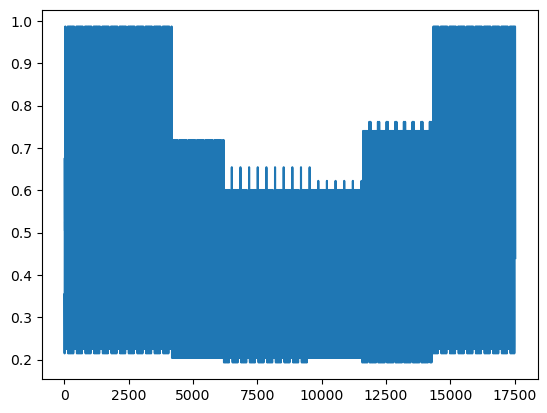

In [201]:
plt.plot(corrected_ken_avg_nd_load_profile)

# MAKE MORE ASTHETIC PLOT FOR REPORT:

To generate the various plots turn days:

= 0 for winter weekday 
= 1 for winter sat
= 2 for winter sun 


= 148 for summer weekday
= 149 for summer sat 
= 150 for summmer sun 

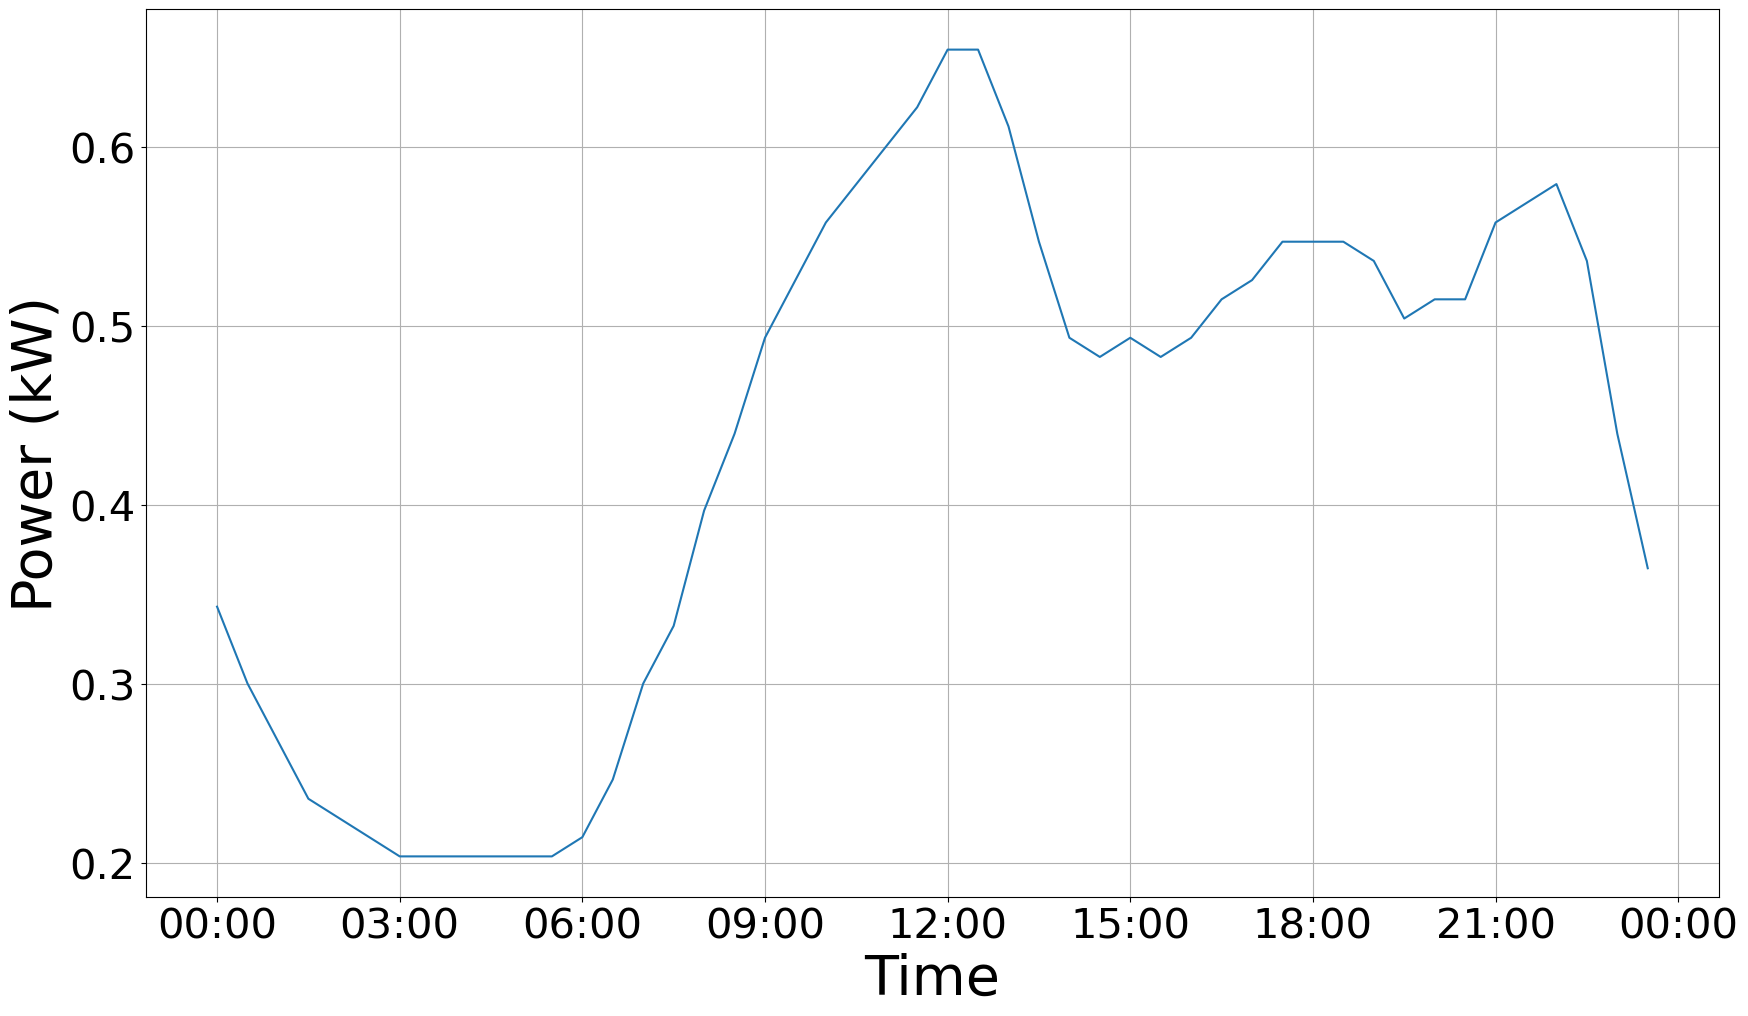

In [202]:
plt.style.use('default')
fig2, ax2 = plt.subplots(figsize=(17,10))
#ax.plot(EV_df[:,0],EV_df[:,1])

fig2.tight_layout(pad=3.0)

#x_axis = pd.date_range('2020' + '-06-06', periods = 48, freq= '0.5H') 
myFmt = mdates.DateFormatter('%H:%M')       # format the times into Hour:Minute format
#plt.gcf().autofmt_xdate()                   # automatic rotation of the axis plots
   

day = 149    # assume the days of year start with 1st Jan numbered as 0 

ax2.plot(ken_nd_df['Time'][day*48:(day+1)*48],ken_nd_df['Power (kW)'][day*48:(day+1)*48])

ax2.set_ylabel('Power (kW)')
ax2.set_xlabel('Time')
#ax2.set_title('Domestic Demand - Winter Weekday (6th Jan)')
ax2.xaxis.set_major_formatter(myFmt)   # apply HH:MM format to the x axis data
ax2.grid(b=True)

ax2.xaxis.label.set_size(40)
ax2.yaxis.label.set_size(40)
ax2.title.set_size(40)

ax2.tick_params(axis='both', which='major', labelsize=30)